In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = h5py.File('cutout_344137.hdf5','r')

In [4]:
data['PartType1'].keys()

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>

In [5]:
data['PartType1']['Coordinates'][:]

array([[ 3513.58629858, 18135.43560775, 13033.63899422],
       [ 3513.68575398, 18135.19581946, 13033.53707777],
       [ 3513.65631593, 18135.25617358, 13033.6167714 ],
       ...,
       [ 3558.64926772, 18168.06287764, 13026.44102234],
       [ 3500.46194437, 18102.38602752, 13090.12704697],
       [ 3561.27095091, 18151.83762453, 13068.8706097 ]],
      shape=(268525, 3))

In [6]:
coord = np.array(data['PartType1']['Coordinates'])
coord

array([[ 3513.58629858, 18135.43560775, 13033.63899422],
       [ 3513.68575398, 18135.19581946, 13033.53707777],
       [ 3513.65631593, 18135.25617358, 13033.6167714 ],
       ...,
       [ 3558.64926772, 18168.06287764, 13026.44102234],
       [ 3500.46194437, 18102.38602752, 13090.12704697],
       [ 3561.27095091, 18151.83762453, 13068.8706097 ]],
      shape=(268525, 3))

Compute relative distance R, so we can transfer to cillyndrical coördinates and make a 2D plot

In [7]:
#devide by h for correct units
x = coord[:,0]/ 0.67
y = coord[:, 1] /0.67
z = coord[:,2]/0.67
R = np.sqrt(x**2 + y**2)

In [8]:
R

array([27571.14022189, 27570.81709742, 27570.89717623, ...,
       27631.79976971, 27518.98891632, 27608.78803842], shape=(268525,))

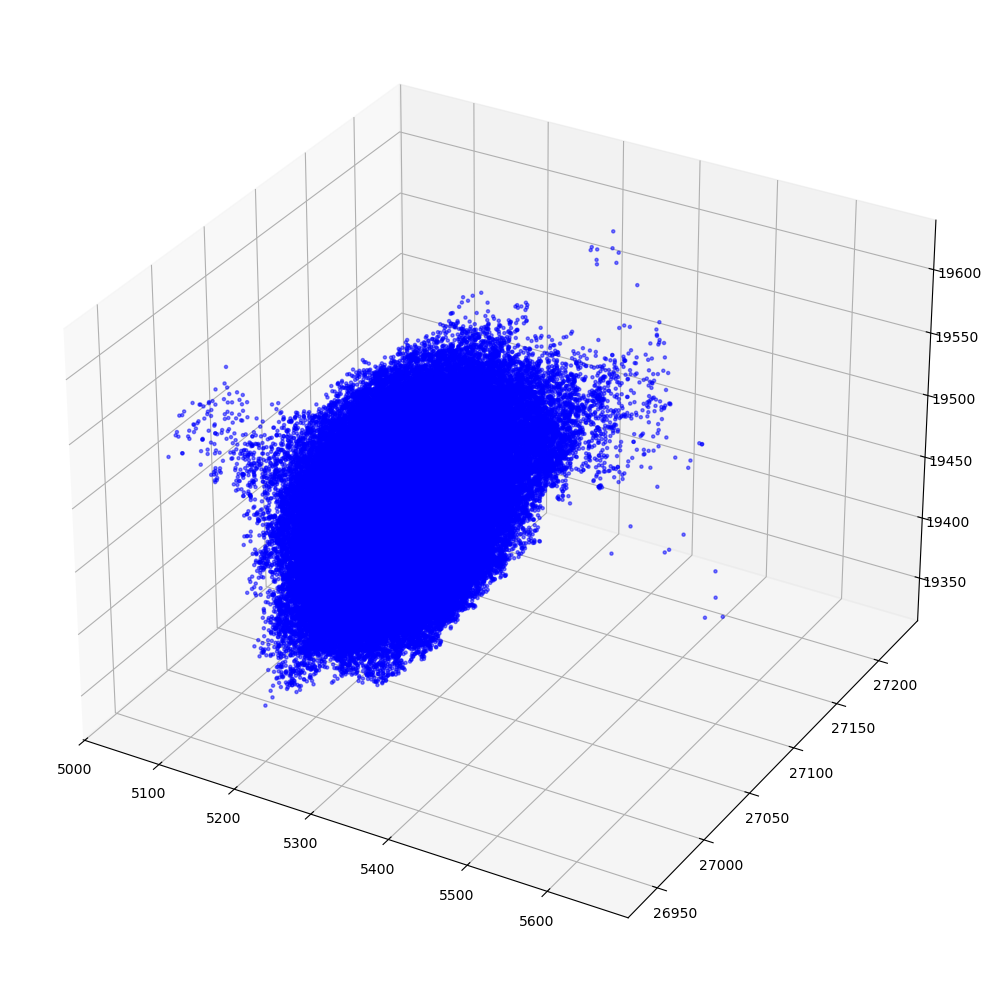

In [ ]:

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, s=5, alpha=0.5, c ='b')
plt.tight_layout()
plt.show()


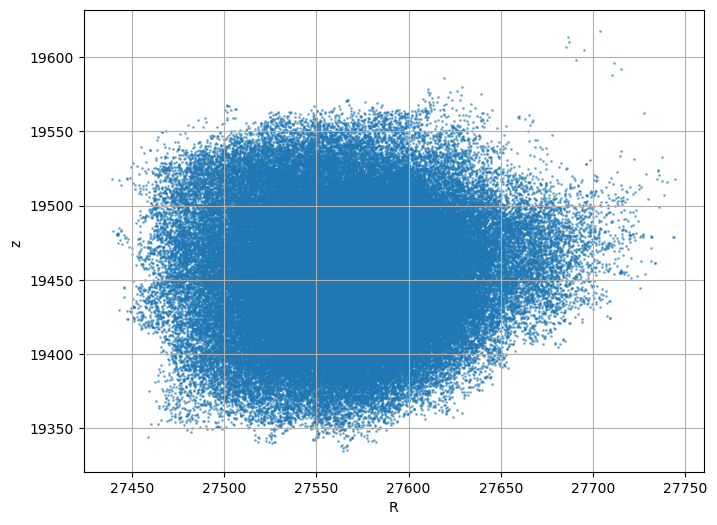

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(R, z, s=1, alpha=0.5)
plt.xlabel('R')
plt.ylabel('z ')
plt.grid(True)
plt.show()

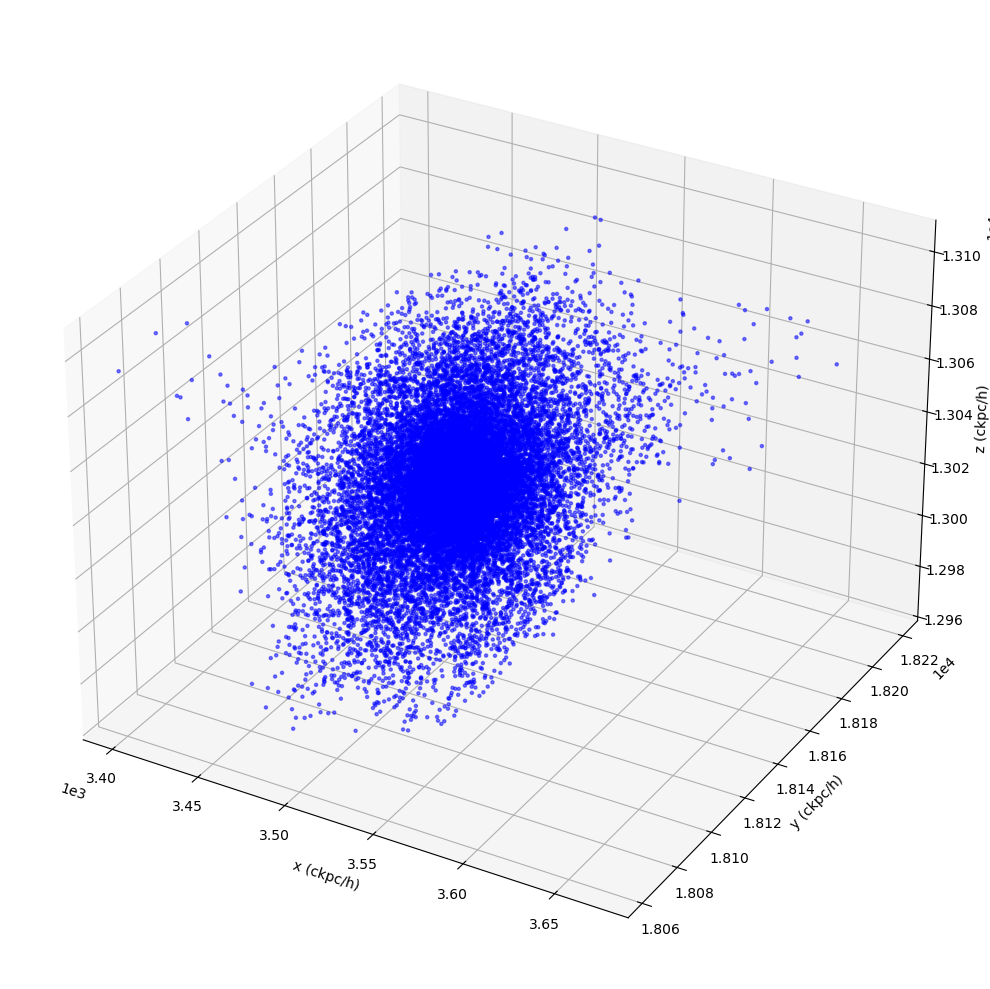

In [ ]:
#make the visualization better with less data points > sampled positions


num_points = 25000 #otherwise we get a crowded plot
indices = np.random.choice(coord.shape[0], num_points, replace=False)
sampled_positions = coord[indices]

x_min, x_max = sampled_positions[:, 0].min(), sampled_positions[:, 0].max()
y_min, y_max = sampled_positions[:, 1].min(), sampled_positions[:, 1].max()
z_min, z_max = sampled_positions[:, 2].min(), sampled_positions[:, 2].max()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(sampled_positions[:, 0], sampled_positions[:, 1], sampled_positions[:, 2], s=5, alpha=0.5, c ='b')

ax.ticklabel_format(style='sci', scilimits=(0, 0), axis='x')
ax.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
ax.ticklabel_format(style='sci', scilimits=(0, 0), axis='z')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)
ax.set_xlabel('x (ckpc/h)')
ax.set_ylabel('y (ckpc/h)')
ax.set_zlabel('z (ckpc/h)')

plt.tight_layout()
plt.show()

 Looks still very dense near the buldge

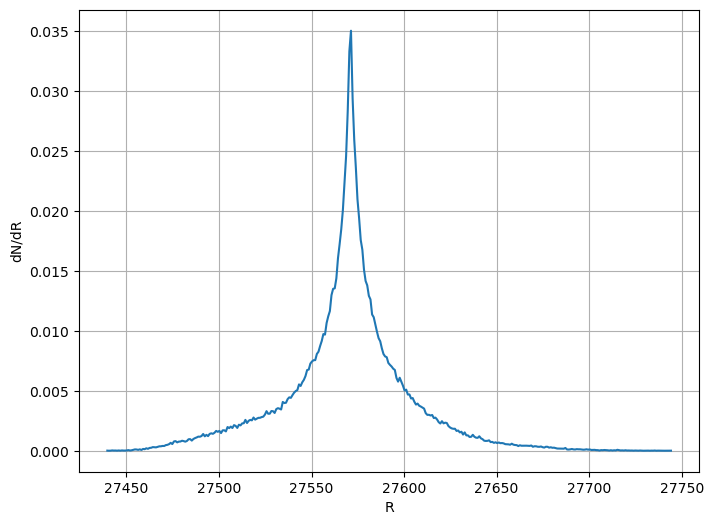

In [16]:
#Compute a histogram for diffrent radii

bins = np.linspace(0, R.max(), 100)  

counts, bin_edges = np.histogram(R, bins='auto', density= True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(figsize=(8,6))
plt.plot(bin_centers, counts)
plt.xlabel('R')
plt.ylabel('dN/dR')
plt.grid(True)
plt.show()

fewer at edges, more near the centre (bulk)

In [ ]:
#tes

Hallo this is a markdown cell.